In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [130]:


hospital_readmissions_df = pd.read_excel("../Data/hospital_readmissions.xlsx")

diabetic_data_df = pd.read_csv("../Data/diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv")



# Hospitals Readmissions Bias Analysis

In [3]:
# So we wanna do a couple of things. Obviously we would like to do some preliminary analysis on this dataset. We are going to analyze where in this dataset are we seeing a more biased type of thing.
# then, this is going to help us so that when we build a couple of models, the idea is to see and analyze, how is bias affecting the models, etc. We are gonna split and analyze, on younger patients for example. Things like that.
# Also, we already have bias but in the datasets where we are balanced perhaps go with a more biased and introduce more and see if it affects the outcome more and more.
# So in this section, we are gonna be introducing a parameter and then basically thats the bias introduction. For this dataset it will be age, but with the other datasets we will do this experiment on other metrics. We need to implement 2 other algorthms to compare against, and also we should put a deep learning algorithm to c
# Ok so the first thing is the first dataset:
hospital_readmissions_df

age  time_in_hospital  n_lab_procedures  n_procedures  \
0      [70-80)                 8                72             1   
1      [70-80)                 3                34             2   
2      [50-60)                 5                45             0   
3      [70-80)                 2                36             0   
4      [60-70)                 1                42             0   
...        ...               ...               ...           ...   
24995  [80-90)                14                77             1   
24996  [80-90)                 2                66             0   
24997  [70-80)                 5                12             0   
24998  [70-80)                 2                61             3   
24999  [50-60)                10                37             1   

       n_medications  n_outpatient  n_inpatient  n_emergency  \
0                 18             2            0            0   
1                 13             0            0            0   
2                 18             0            0            0   
3                 12             1            0            0   
4                  7             0            0            0   
...              ...           ...          ...          ...   
24995             30             0            0            0   
24996             24             0            0            0   
24997              6             0            1            0   
24998             15             0            0            0   
24999             24             0            0            0   

            medical_specialty       diag_1       diag_2       diag_3  \
0                     Missing  Circulatory  Respiratory        Other   
1                       Other        Other        Other        Other   
2                     Missing  Circulatory  Circulatory  Circulatory   
3                     Missing  Circulatory        Other     Diabetes   
4            InternalMedicine        Other  Circulatory  Respiratory   
...                       ...          ...          ...          ...   
24995                 Missing  Circulatory        Other  Circulatory   
24996                 Missing    Digestive       Injury        Other   
24997                 Missing        Other        Other        Other   
24998  Family/GeneralPractice  Respiratory     Diabetes        Other   
24999                 Missing        Other     Diabetes  Circulatory   

      glucose_test A1Ctest change diabetes_med readmitted  
0               no      no     no          yes         no  
1               no      no     no          yes         no  
2               no      no    yes          yes        yes  
3               no      no    yes          yes        yes  
4               no      no     no          yes         no  
...            ...     ...    ...          ...        ...  
24995           no  normal     no           no        yes  
24996           no    high    yes          yes        yes  
24997       normal      no     no           no        yes  
24998           no      no    yes          yes         no  
24999           no      no     no           no        yes  

[25000 rows x 17 columns]

In [4]:
hospital_readmissions_df_ORIGINAL = hospital_readmissions_df.copy(deep=True)

In [5]:
import pandas as pd
import numpy as np

# Define the bias parameter (0.1 = remove 10% of young patients)
BIAS_INTO_PERCENT = 0.0

# Identify young patients (age 40-60)
young_mask = hospital_readmissions_df['age'].isin(['[40-50)', '[50-60)'])
young_patients = hospital_readmissions_df[young_mask]

# Randomly remove a fraction of them
np.random.seed(42)  # For reproducibility
remove_n = int(len(young_patients) * BIAS_INTO_PERCENT)
drop_indices = np.random.choice(young_patients.index, remove_n, replace=False)

# Create the biased dataset (original minus removed young patients)
biased_df = hospital_readmissions_df.drop(drop_indices)

# Verify
original_young_count = len(young_patients)
remaining_young_count = len(biased_df[biased_df['age'].isin(['[40-50)', '[50-60)'])])
print(f"Removed {original_young_count - remaining_young_count} young patients ({BIAS_INTO_PERCENT*100}%)")

hospital_readmissions_df = biased_df

Removed 0 young patients (0.0%)


In [6]:
print("Age group distribution:")
print(hospital_readmissions_df['age'].value_counts())

Age group distribution:
age
[70-80)     6837
[60-70)     5913
[80-90)     4516
[50-60)     4452
[40-50)     2532
[90-100)     750
Name: count, dtype: int64


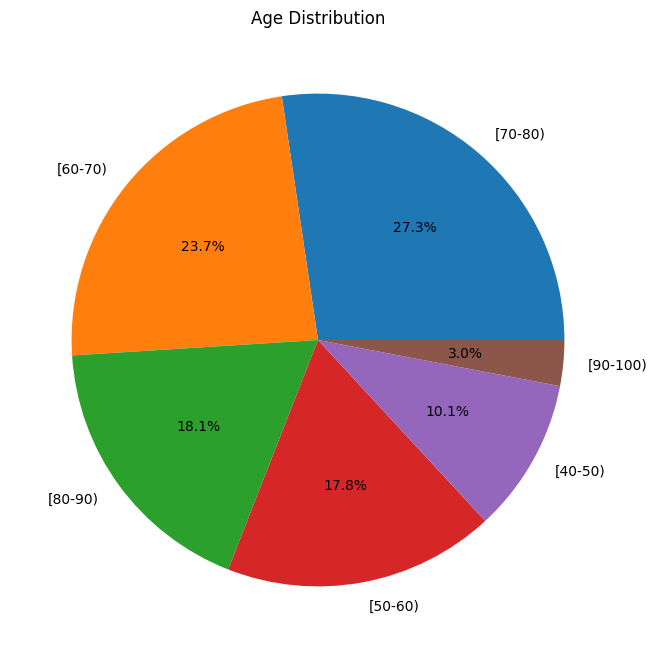

In [7]:
age_counts = hospital_readmissions_df['age'].value_counts()
# Create pie chart
plt.figure(figsize=(8, 8))
age_counts.plot.pie(autopct='%1.1f%%')
plt.title('Age Distribution')
plt.ylabel('')  # Remove the 'age' label
plt.show()

In [8]:
age_groups = sorted(hospital_readmissions_df['age'].unique())
print("Age groups in the dataset:", age_groups)

Age groups in the dataset: ['[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']


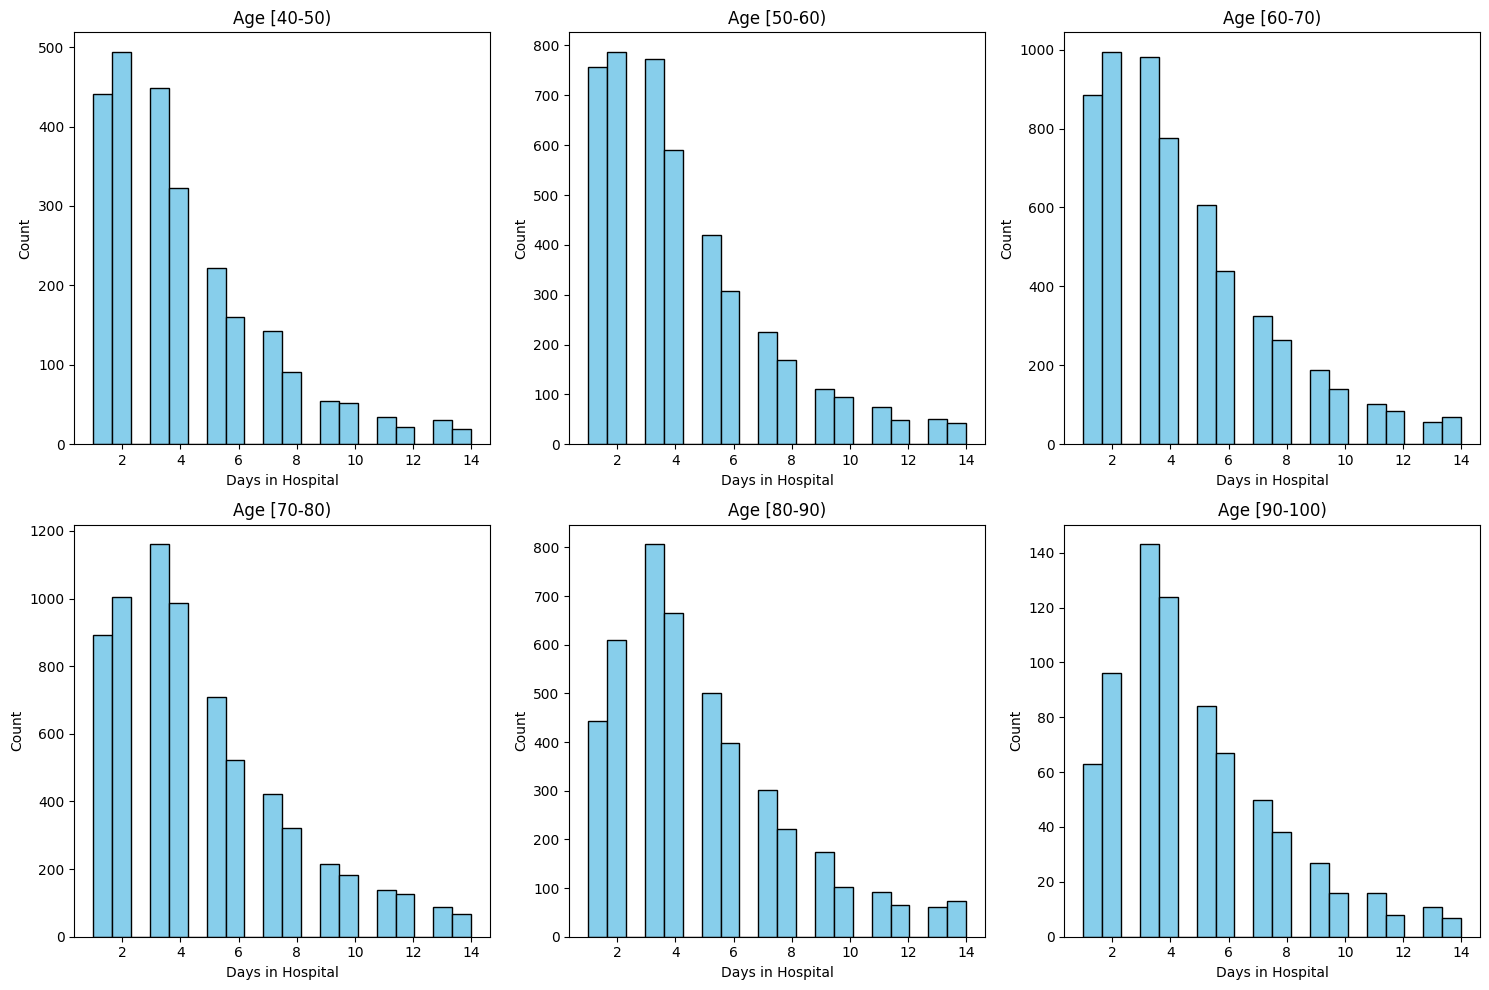

In [9]:
# So this could be one way the data is skewed, where the age is more towards the elder. So bias has already been introduced partially. Later we will slice this further and take into account only a specific age group and see how that affects the others when predicitng stuff.
# Define age groups
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.ravel()  # Flatten the axes array

for i, age in enumerate(age_groups):
    data = hospital_readmissions_df[hospital_readmissions_df['age'] == age]['time_in_hospital']
    axes[i].hist(data, bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Age {age}')
    axes[i].set_xlabel('Days in Hospital')
    axes[i].set_ylabel('Count')

plt.tight_layout()  # Prevents overlapping labels
plt.show()

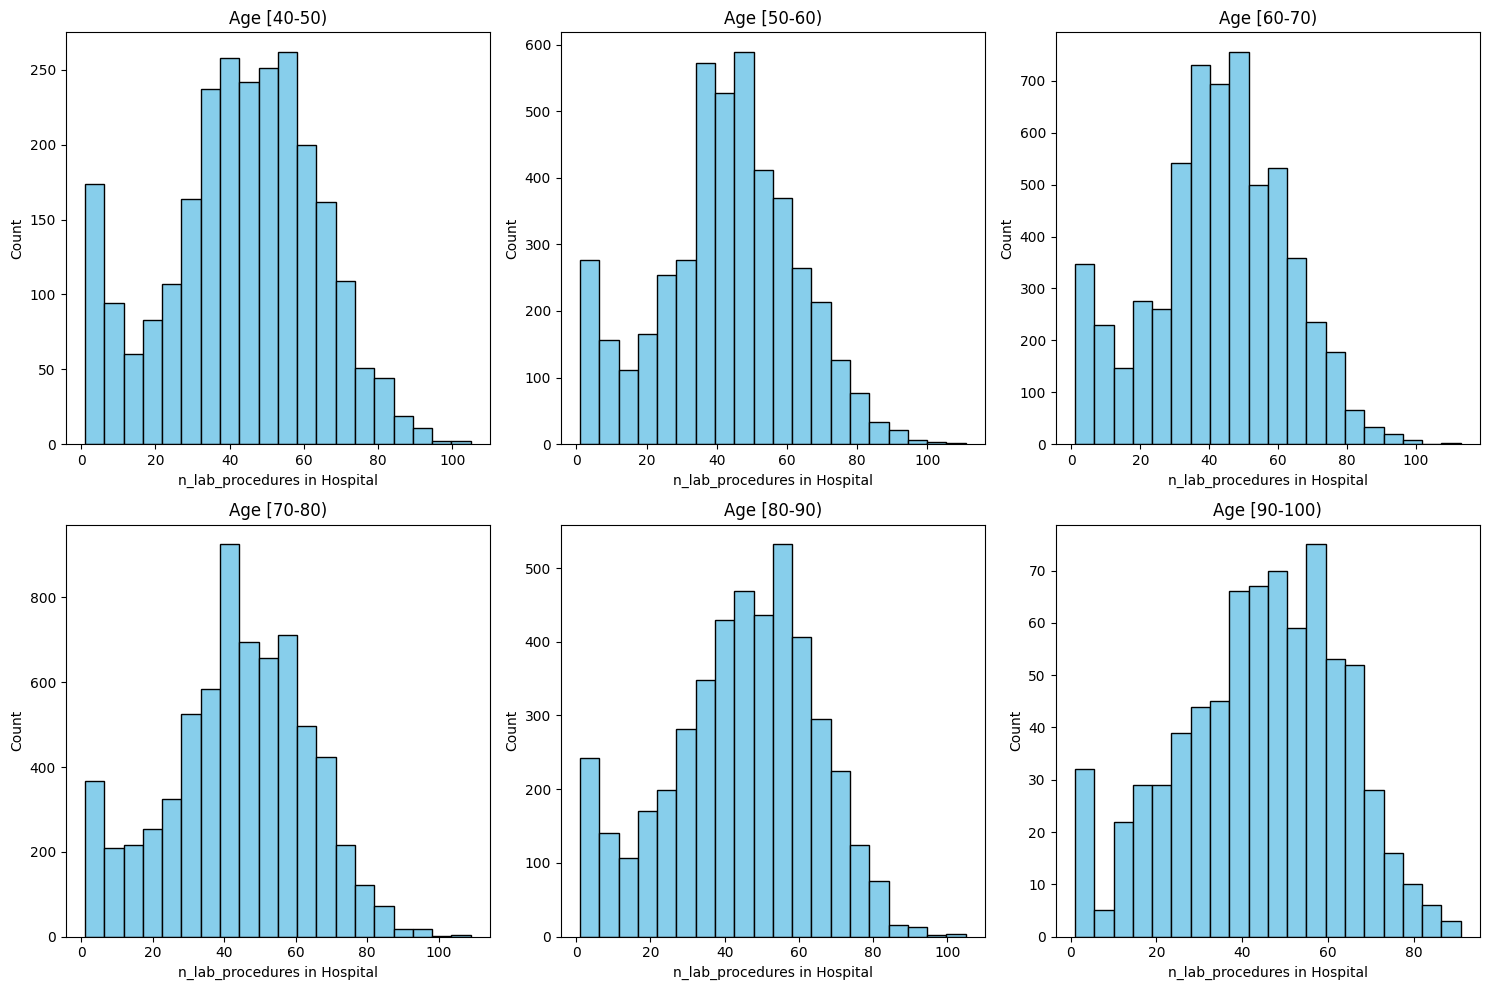

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.ravel()  # Flatten the axes array

for i, age in enumerate(age_groups):
    data = hospital_readmissions_df[hospital_readmissions_df['age'] == age]['n_lab_procedures']
    axes[i].hist(data, bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Age {age}')
    axes[i].set_xlabel('n_lab_procedures in Hospital')
    axes[i].set_ylabel('Count')

plt.tight_layout()  # Prevents overlapping labels
plt.show()

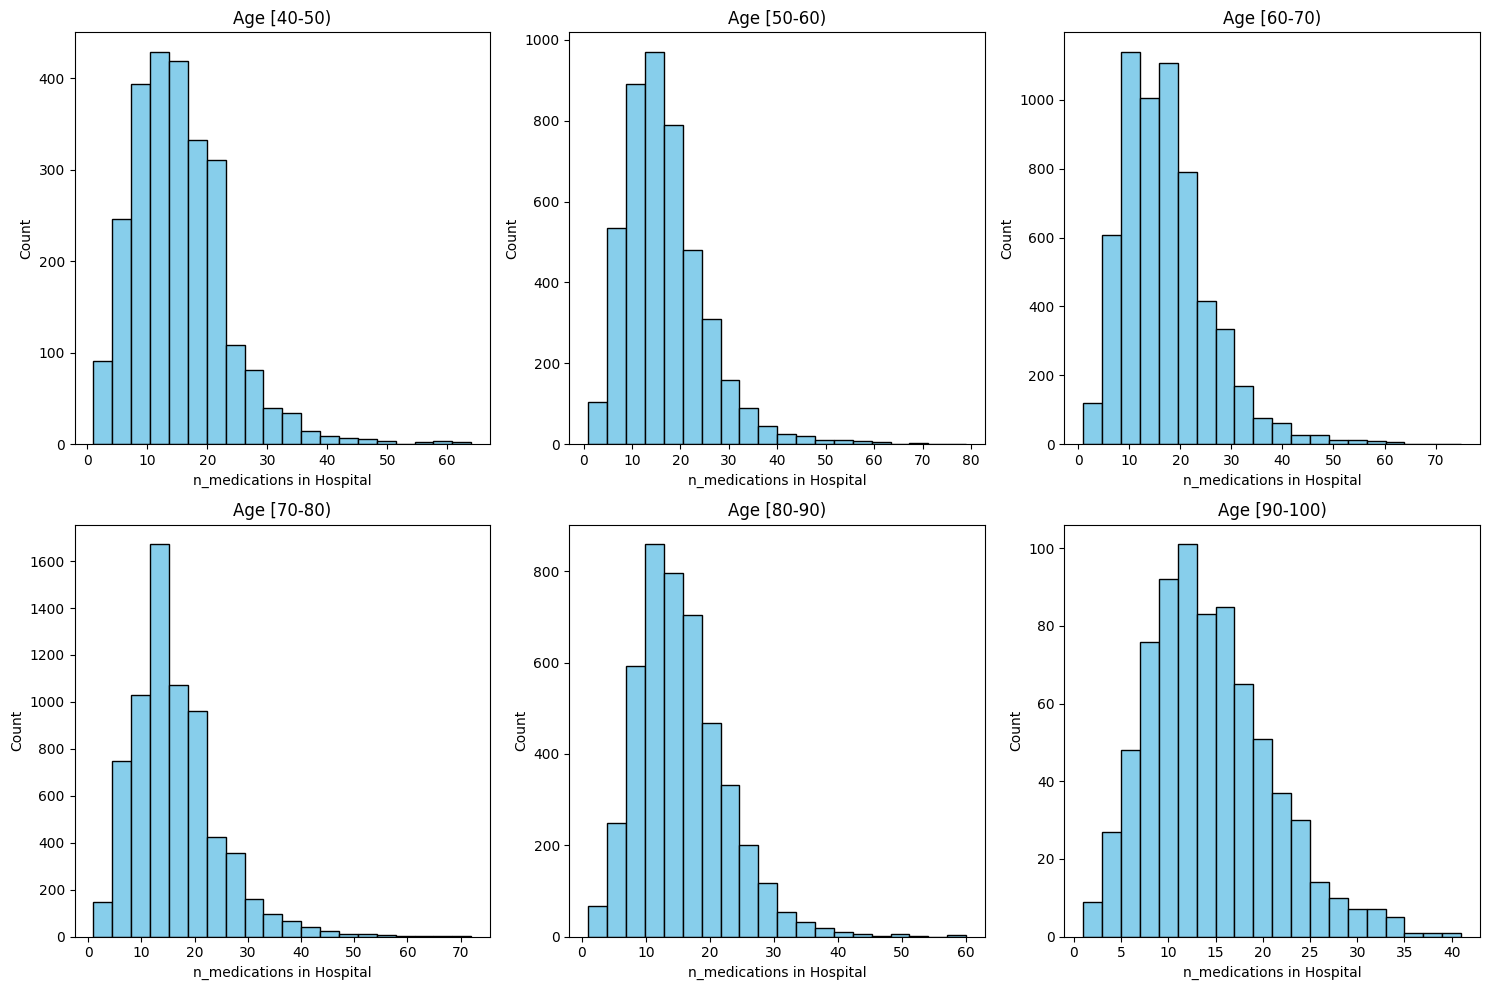

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.ravel()  # Flatten the axes array

for i, age in enumerate(age_groups):
    data = hospital_readmissions_df[hospital_readmissions_df['age'] == age]['n_medications']
    axes[i].hist(data, bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Age {age}')
    axes[i].set_xlabel('n_medications in Hospital')
    axes[i].set_ylabel('Count')

plt.tight_layout()  # Prevents overlapping labels
plt.show()

In [12]:
print(hospital_readmissions_df['medical_specialty'].value_counts())

medical_specialty
Missing                   12382
InternalMedicine           3565
Other                      2664
Emergency/Trauma           1885
Family/GeneralPractice     1882
Cardiology                 1409
Surgery                    1213
Name: count, dtype: int64


n_emergency
0     22272
1      1842
2       525
3       167
4        83
5        40
7        18
6        18
10        6
8         6
9         6
18        3
11        3
12        2
16        2
19        2
28        1
37        1
21        1
13        1
64        1
Name: count, dtype: int64


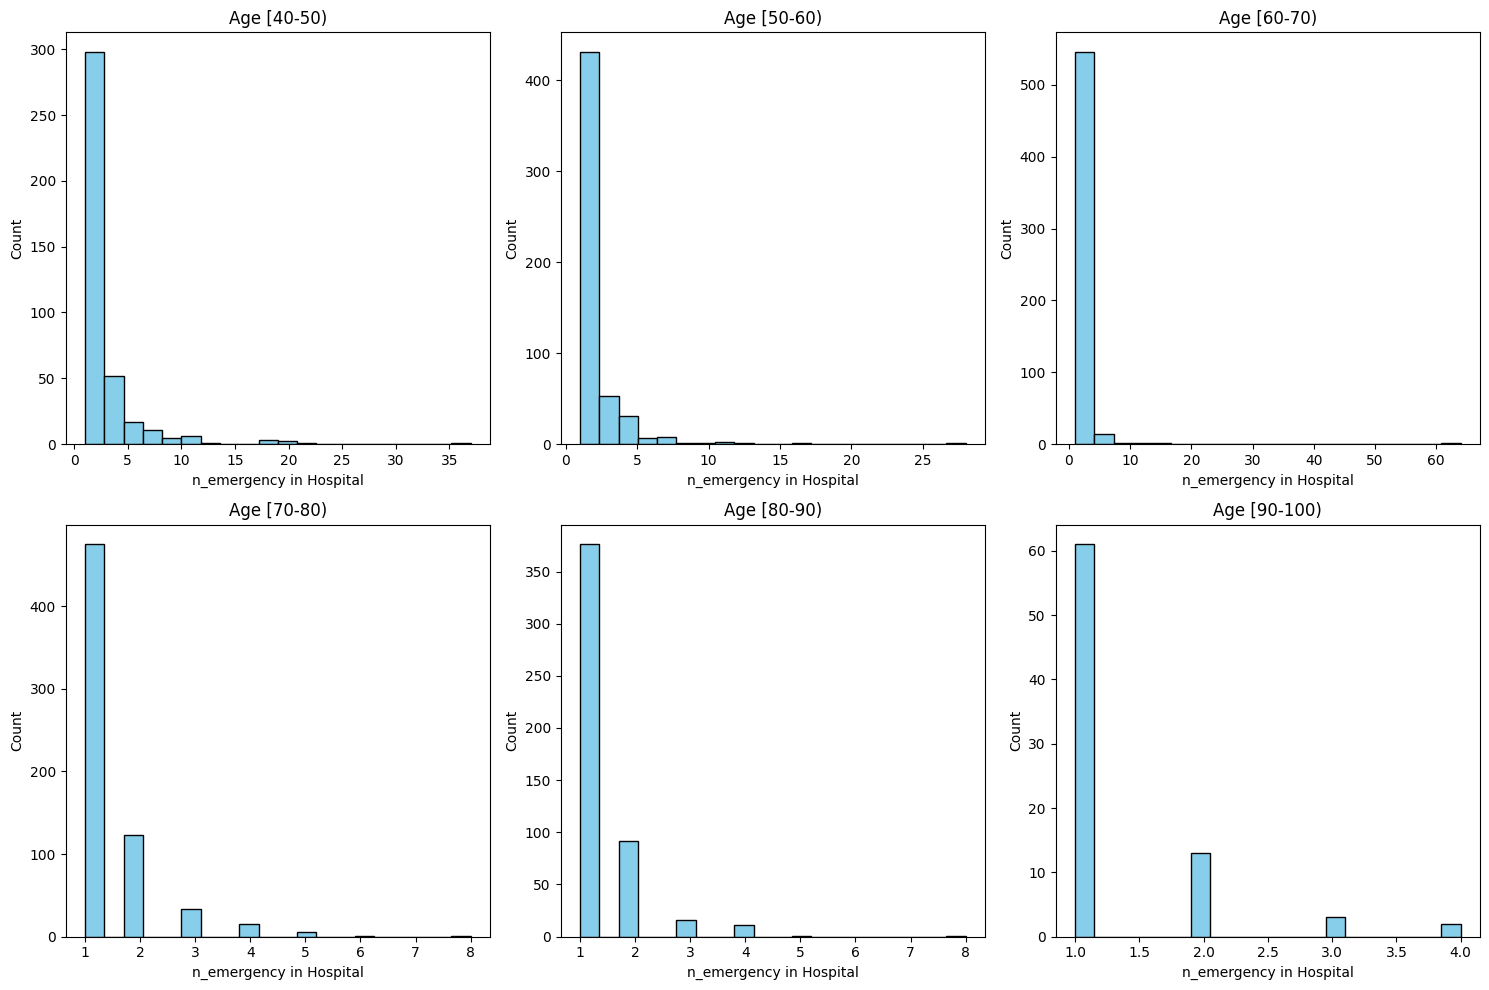

In [13]:
print(hospital_readmissions_df['n_emergency'].value_counts())

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.ravel()  # Flatten the axes array

for i, age in enumerate(age_groups):
    data = hospital_readmissions_df[(hospital_readmissions_df['age'] == age) & (hospital_readmissions_df['n_emergency'] != 0)]['n_emergency']
    axes[i].hist(data, bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Age {age}')
    axes[i].set_xlabel('n_emergency in Hospital')
    axes[i].set_ylabel('Count')

plt.tight_layout()  # Prevents overlapping labels
plt.show()

readmitted
no     13246
yes    11754
Name: count, dtype: int64
[40-50) readmitted
no     1405
yes    1127
Name: count, dtype: int64
1.2466725820763087
[50-60) readmitted
no     2486
yes    1966
Name: count, dtype: int64
1.2644964394710072
[60-70) readmitted
no     3143
yes    2770
Name: count, dtype: int64
1.1346570397111913
[70-80) readmitted
no     3501
yes    3336
Name: count, dtype: int64
1.0494604316546763
[80-90) readmitted
no     2277
yes    2239
Name: count, dtype: int64
1.0169718624385886
[90-100) readmitted
no     434
yes    316
Name: count, dtype: int64
1.3734177215189873


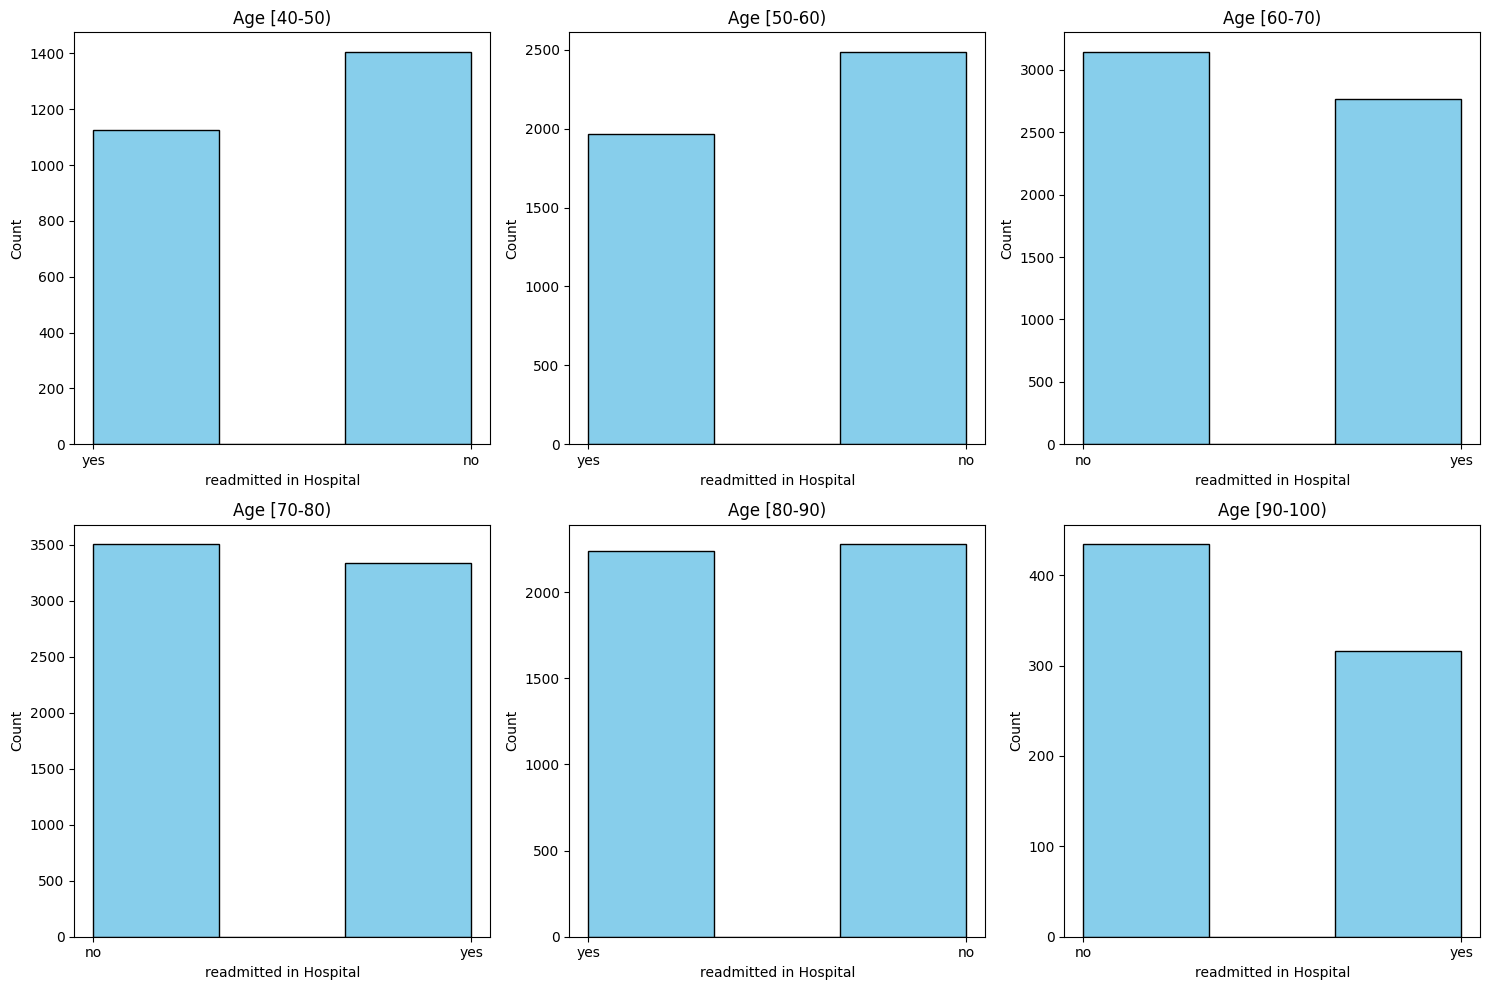

In [14]:
# So again, here we are just simply doing some analysis of the data to get familiar with what it looks like. The actual relationships can be found by the model etc. So far we have only been seeing stuff with age that seems to be kind of a thing or not.

print(hospital_readmissions_df['readmitted'].value_counts())

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.ravel()  # Flatten the axes array

for i, age in enumerate(age_groups):
    data = hospital_readmissions_df[hospital_readmissions_df['age'] == age]['readmitted']
    print(age, data.value_counts())
    print(data.value_counts()["no"]/data.value_counts()["yes"])
    axes[i].hist(data, bins=3, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Age {age}')
    axes[i].set_xlabel('readmitted in Hospital')
    axes[i].set_ylabel('Count')

plt.tight_layout()  # Prevents overlapping labels
plt.show()

In [15]:
# So now that we have an idea, let us build something with stats and deep right away. we are gonna do it the original way first to establish a baseline. Then, we are going to be introducing some bias as we go, and seeing how it affects it. 
# DECISION TREE

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = hospital_readmissions_df.copy(deep=True)

# Encode target variable
df['readmitted'] = df['readmitted'].map({'NO': 0, 'YES': 1, 'No': 0, 'Yes': 1, 'no': 0, 'yes': 1})  # normalize casing

# Handle age brackets (convert to numeric midpoint for now, or you could keep it categorical)
age_map = {
    '[0-10)': 5, '[10-20)': 15, '[20-30)': 25, '[30-40)': 35,
    '[40-50)': 45, '[50-60)': 55, '[60-70)': 65,
    '[70-80)': 75, '[80-90)': 85, '[90-100)': 95
}
df['age'] = df['age'].map(age_map)

# Drop rows with missing target
df = df.dropna(subset=['readmitted'])

# Encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Define features and target
X = df.drop(columns=['readmitted'])
y = df['readmitted']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6078
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.71      0.66      2658
           1       0.60      0.49      0.54      2342

    accuracy                           0.61      5000
   macro avg       0.61      0.60      0.60      5000
weighted avg       0.61      0.61      0.60      5000



In [16]:
# Predict and analyze by age group
X_test_with_age = X_test.copy()
X_test_with_age['true'] = y_test
X_test_with_age['pred'] = y_pred

# Group by age bracket
age_bins = [0, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['<40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
X_test_with_age['age_group'] = pd.cut(X_test_with_age['age'], bins=age_bins, labels=age_labels)

grouped = X_test_with_age.groupby('age_group').apply(
    lambda g: pd.Series({
        'accuracy': accuracy_score(g['true'], g['pred']),
        'count': len(g)
    })
)

print("\nAccuracy by Age Group:\n", grouped)



Accuracy by Age Group:
            accuracy   count
age_group                  
<40             NaN     0.0
40-50      0.654135   532.0
50-60      0.632272   911.0
60-70      0.624685  1191.0
70-80      0.591882  1355.0
80-90      0.568027   882.0
90-100     0.527132   129.0


C:\Users\rsanz\AppData\Local\Temp\ipykernel_29300\783202018.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = X_test_with_age.groupby('age_group').apply(
C:\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:557: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Python312\Lib\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\rsanz\AppData\Local\Temp\ipykernel_29300\783202018.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly sele

C:\Users\rsanz\AppData\Local\Temp\ipykernel_29300\2432765334.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bias = X_test_with_age.groupby('age_group')['pred_proba'].mean()


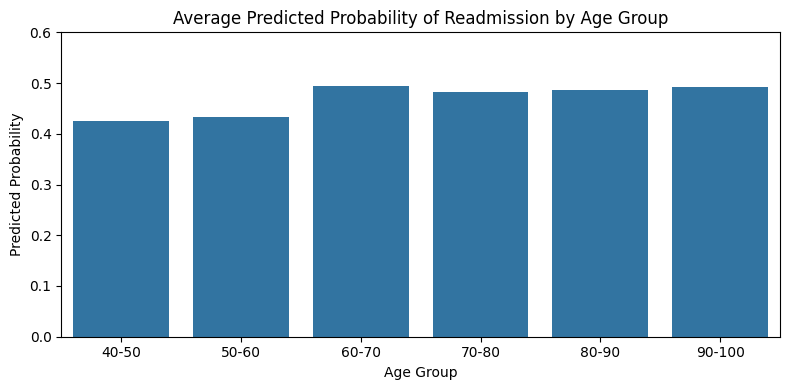

In [17]:
import seaborn as sns
# Get probabilities of being readmitted
y_proba = clf.predict_proba(X_test)[:, 1]

# Add to dataframe
X_test_with_age['pred_proba'] = y_proba

# Group by age bins and compute average prediction
age_bins = [40, 50, 60, 70, 80, 90, 100]
age_labels = ['40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
X_test_with_age['age_group'] = pd.cut(X_test_with_age['age'], bins=age_bins, labels=age_labels)

age_bias = X_test_with_age.groupby('age_group')['pred_proba'].mean()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=age_bias.index, y=age_bias.values)
plt.title("Average Predicted Probability of Readmission by Age Group")
plt.ylabel("Predicted Probability")
plt.xlabel("Age Group")
plt.ylim(0, 0.6)
plt.tight_layout()
plt.show()

In [18]:
# So what do we make of this? 
# Well the conclusion we can draw from this is that instead of introducing Bias, we don't need to for this dataset due to the inherent unbalanced in the dataset. Remember, we are seeing how it affects it, and we are already seeing how it affects.
# Take a look at how the accuracies work for each of the age groups:
# 40-50      0.654135   532.0
# 50-60      0.632272   911.0
# 60-70      0.624685  1191.0
#70-80      0.591882  1355.0
#80-90      0.568027   882.0
#90-100     0.527132   129.0
# So although we have more data for the elder, because for the youth we don't have as much, the model might learn that it's easier for the younger folks to predict, or its more balanced, or its better. How is this bias? Talk on this.

# Notice:
#Missing                   12382
#InternalMedicine           3565
#Other                      2664
#Emergency/Trauma           1885
#Family/GeneralPractice     1882
#Cardiology                 1409
#Surgery                    1213

Let’s break this down in a clean way:

📊 What Are We Seeing?
Your model's accuracy drops as age increases:

Age Group	Accuracy	Count
40–50	65.4%	532
50–60	63.2%	911
60–70	62.4%	1191
70–80	59.2%	1355
80–90	56.8%	882
90–100	52.7%	129
Even though you have more data for the elderly, the model performs worse on them.

🤔 Is This Bias?
Yes — this is an example of performance bias (sometimes called group fairness issues):

The model performs significantly better for some groups (younger patients) than others (older patients), even though older patients are more represented in the dataset.

💡 Why Is This Happening?
Some hypotheses:

Feature overlap: Older patients might have more similar or complex medical profiles, making it harder to separate readmitted from not-readmitted cases.

Label noise: Readmission decisions for older patients could be influenced by more unobserved factors (social care, comorbidities), leading to less predictable outcomes.

Model learning shortcuts: It might be learning that "younger = easier to predict," so it generalizes poorly for older groups.

🔍 So Why Is It Bias?
Because:

The model is systematically underperforming for a certain group (older adults).

This leads to unfair treatment or less reliable predictions for that group.

Even if the data is balanced in size, the difficulty of prediction across groups can still result in biased outcomes.

Bias ≠ always about unequal data.
Bias = unequal performance or treatment.

TL;DR
Your model is biased not because of the quantity of data, but because it learns patterns that favor younger patients. Bias here shows up as a performance disparity, which can lead to unfair or unreliable decisions in real-world use.

Want to visualize this or see how to fix it step by step?

# Diabetes Dataset bias analysis

In [131]:
diabetic_data_df

encounter_id  patient_nbr             race  gender      age weight  \
0            2278392      8222157        Caucasian  Female   [0-10)      ?   
1             149190     55629189        Caucasian  Female  [10-20)      ?   
2              64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3             500364     82442376        Caucasian    Male  [30-40)      ?   
4              16680     42519267        Caucasian    Male  [40-50)      ?   
...              ...          ...              ...     ...      ...    ...   
101761     443847548    100162476  AfricanAmerican    Male  [70-80)      ?   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)      ?   
101763     443854148     41088789        Caucasian    Male  [70-80)      ?   
101764     443857166     31693671        Caucasian  Female  [80-90)      ?   
101765     443867222    175429310        Caucasian    Male  [70-80)      ?   

        admission_type_id  discharge_disposition_id  admission_source_id  \
0                       6                        25                    1   
1                       1                         1                    7   
2                       1                         1                    7   
3                       1                         1                    7   
4                       1                         1                    7   
...                   ...                       ...                  ...   
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                      1  ...          No      No                   No   
1                      3  ...          No      Up                   No   
2                      2  ...          No      No                   No   
3                      2  ...          No      Up                   No   
4                      1  ...          No  Steady                   No   
...                  ...  ...         ...     ...                  ...   
101761                 3  ...          No    Down                   No   
101762                 5  ...          No  Steady                   No   
101763                 1  ...          No    Down                   No   
101764                10  ...          No      Up                   No   
101765                 6  ...          No      No                   No   

        glipizide-metformin  glimepiride-pioglitazone  \
0                        No                        No   
1                        No                        No   
2                        No                        No   
3                        No                        No   
4                        No                        No   
...                     ...                       ...   
101761                   No                        No   
101762                   No                        No   
101763                   No                        No   
101764                   No                        No   
101765                   No                        No   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
0                            No                      No      No          No   
1                            No                      No      Ch         Yes   
2                            No                      No      No         Yes   
3                            No                      No      Ch         Yes   
4                            No                      No      Ch         Yes   
...                         ...                     ...     ...         ...   
101761                       No

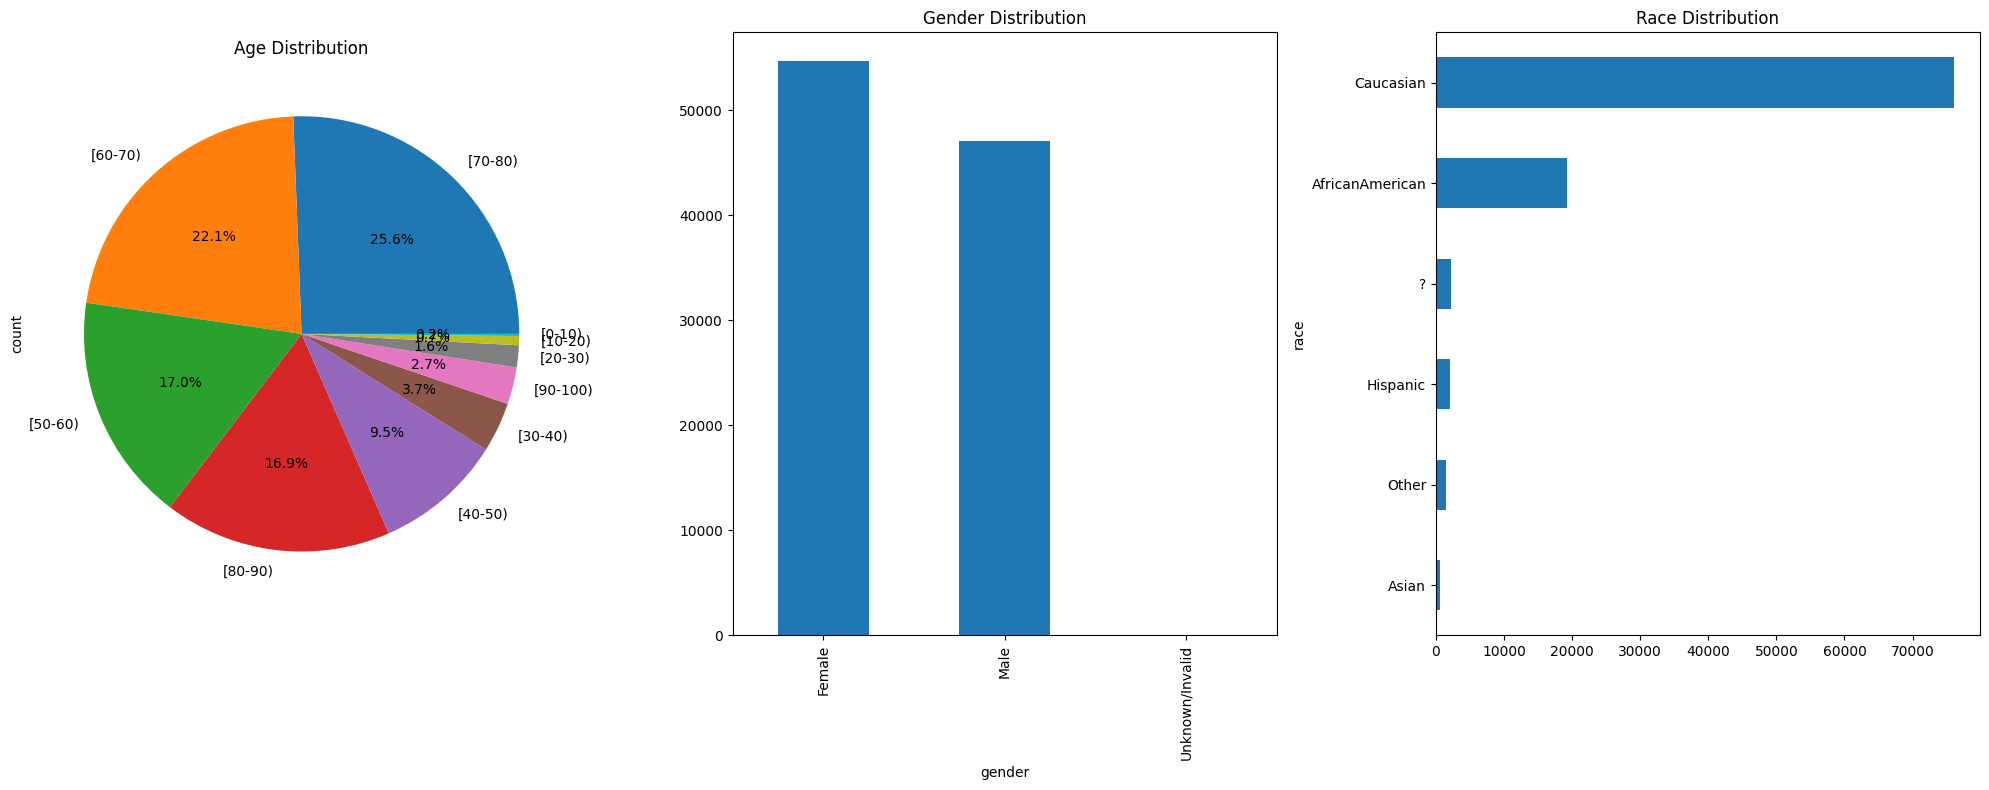

In [132]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

# Age
diabetic_data_df['age'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1)
ax1.set_title('Age Distribution')

# Gender
diabetic_data_df['gender'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_title('Gender Distribution')

# Race
diabetic_data_df['race'].value_counts().sort_values().plot(kind='barh', ax=ax3)
ax3.set_title('Race Distribution')

plt.tight_layout()
plt.show()

In [133]:
diabetic_data_df['age'].value_counts()

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

In [134]:
diabetic_data_df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [135]:
diabetic_data_df['readmitted'].value_counts()

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

In [136]:
diabetic_data_df['readmitted'] = diabetic_data_df['readmitted'].map({'NO': 0, '>30': 1, '<30': 1})

In [137]:
df = diabetic_data_df.drop(columns=['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty'])

In [138]:
df

race  gender      age  admission_type_id  \
0             Caucasian  Female   [0-10)                  6   
1             Caucasian  Female  [10-20)                  1   
2       AfricanAmerican  Female  [20-30)                  1   
3             Caucasian    Male  [30-40)                  1   
4             Caucasian    Male  [40-50)                  1   
...                 ...     ...      ...                ...   
101761  AfricanAmerican    Male  [70-80)                  1   
101762  AfricanAmerican  Female  [80-90)                  1   
101763        Caucasian    Male  [70-80)                  1   
101764        Caucasian  Female  [80-90)                  2   
101765        Caucasian    Male  [70-80)                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                             25                    1                 1   
1                              1                    7                 3   
2                              1                    7                 2   
3                              1                    7                 2   
4                              1                    7                 1   
...                          ...                  ...               ...   
101761                         3                    7                 3   
101762                         4                    5                 5   
101763                         1                    7                 1   
101764                         3                    7                10   
101765                         1                    7                 6   

        num_lab_procedures  num_procedures  num_medications  ...  citoglipton  \
0                       41               0                1  ...           No   
1                       59               0               18  ...           No   
2                       11               5               13  ...           No   
3                       44               1               16  ...           No   
4                       51               0                8  ...           No   
...                    ...             ...              ...  ...          ...   
101761                  51               0               16  ...           No   
101762                  33               3               18  ...           No   
101763                  53               0                9  ...           No   
101764                  45               2               21  ...           No   
101765                  13               3                3  ...           No   

        insulin  glyburide-metformin glipizide-metformin  \
0            No                   No                  No   
1            Up                   No                  No   
2            No                   No                  No   
3            Up                   No                  No   
4        Steady                   No                  No   
...         ...                  ...                 ...   
101761     Down                   No                  No   
101762   Steady                   No                  No   
101763     Down                   No                  No   
101764       Up                   No                  No   
101765       No                   No                  No   

       glimepiride-pioglitazone metformin-rosiglitazone  \
0                            No                      No   
1                            No                      No   
2                            No                      No   
3                            No                      No   
4                            No                      No   
...                         ...                     ...   
101761                       No                      No   
101762                       No                      No   
101763                       No                      No   
101764                       No                      No   
101765            

In [139]:
df['readmitted'].value_counts()

readmitted
0    54864
1    46902
Name: count, dtype: int64

In [140]:
# Encode categorical variables
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split data (with such small data, we'll use all for training)
X = df.drop('readmitted', axis=1)
y = df['readmitted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#print(X_test)

# Train decision tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
print("\nFeature Importances:")
for feature, importance in zip(X.columns, clf.feature_importances_):
    if importance<=0.009:
        continue
    else:
        print(f"{feature}: {importance:.2f}")

       race  gender  age  admission_type_id  discharge_disposition_id  \
35956     3       0    7                  1                         1   
60927     3       1    5                  1                         1   
79920     3       0    6                  3                         6   
50078     3       1    3                  2                         1   
44080     1       0    6                  1                         2   
...     ...     ...  ...                ...                       ...   
16156     3       1    8                  1                         1   
67386     3       1    4                  3                         1   
81342     3       0    7                  1                         1   
72915     3       1    7                  2                         1   
41510     3       1    8                  3                         1   

       admission_source_id  time_in_hospital  num_lab_procedures  \
35956                    6                11           

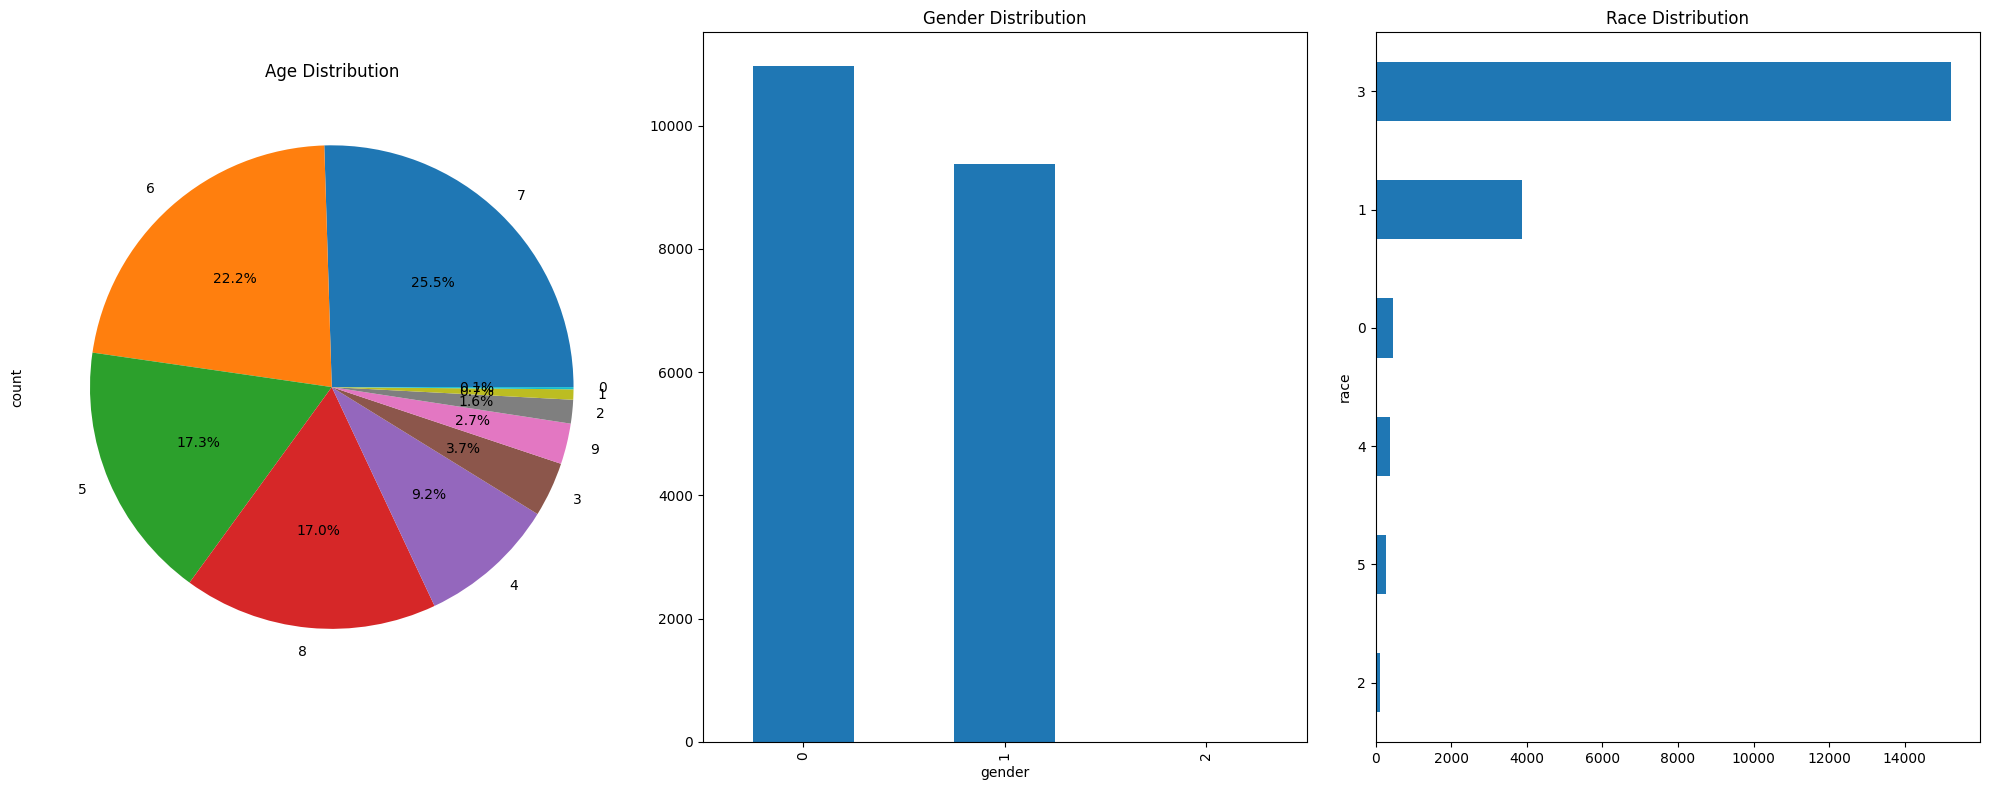

In [142]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

# Age
X_test['age'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1)
ax1.set_title('Age Distribution')

# Gender
X_test['gender'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_title('Gender Distribution')

# Race
X_test['race'].value_counts().sort_values().plot(kind='barh', ax=ax3)
ax3.set_title('Race Distribution')

plt.tight_layout()
plt.show()

In [148]:
# So now we could go through each of these bias bins sort of, and see ok, how accurate are we on these specific sub-groups after training the data?
# Noitce that for age, we are seeing the same situation 

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 1. First verify age column exists and has bracket format
print("Unique age values:", diabetic_data_df['age'].unique())

# 2. Get age groups directly from your data
age_groups = diabetic_data_df['age'].unique()

# 3. Prepare results storage
results = []

# 4. Analyze performance per group
for group in age_groups:
    # Get the correct test set indices for this age group
    test_indices = diabetic_data_df.loc[X_test.index].index[diabetic_data_df.loc[X_test.index, 'age'] == group]
    
    if len(test_indices) > 0:
        X_group = X_test.loc[test_indices]
        y_group = y_test.loc[test_indices]
        y_pred_group = clf.predict(X_group)
        
        results.append({
            'age_bracket': group,
            'accuracy': accuracy_score(y_group, y_pred_group),
            'precision': precision_score(y_group, y_pred_group, average='weighted', zero_division=0),
            'recall': recall_score(y_group, y_pred_group, average='weighted', zero_division=0),
            'n_samples': len(y_group)
        })

# 5. Create and display results
results_df = pd.DataFrame(results)
print("\nPerformance by Age Bracket:")
print(results_df.sort_values('age_bracket'))

Unique age values: ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']

Performance by Age Bracket:
  age_bracket  accuracy  precision    recall  n_samples
0      [0-10)  0.833333   0.694444  0.833333         30
1     [10-20)  0.685714   0.691430  0.685714        140
2     [20-30)  0.757764   0.770065  0.757764        322
3     [30-40)  0.706040   0.707015  0.706040        745
4     [40-50)  0.664533   0.663098  0.664533       1875
5     [50-60)  0.661735   0.659660  0.661735       3515
6     [60-70)  0.634615   0.634403  0.634615       4524
7     [70-80)  0.602428   0.603042  0.602428       5189
8     [80-90)  0.600000   0.598915  0.600000       3460
9    [90-100)  0.588448   0.582027  0.588448        554


In [149]:
# So now we could go through each of these bias bins sort of, and see ok, how accurate are we on these specific sub-groups after training the data?
# Noitce now, lets do it for gender 

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 1. First verify age column exists and has bracket format
print("Unique gender values:", diabetic_data_df['gender'].unique())

# 2. Get age groups directly from your data
gender_groups = diabetic_data_df['gender'].unique()

# 3. Prepare results storage
results = []

# 4. Analyze performance per group
for group in gender_groups:
    # Get the correct test set indices for this age group
    test_indices = diabetic_data_df.loc[X_test.index].index[diabetic_data_df.loc[X_test.index, 'gender'] == group]
    
    if len(test_indices) > 0:
        X_group = X_test.loc[test_indices]
        y_group = y_test.loc[test_indices]
        y_pred_group = clf.predict(X_group)
        
        results.append({
            'gender_bracket': group,
            'accuracy': accuracy_score(y_group, y_pred_group),
            'precision': precision_score(y_group, y_pred_group, average='weighted', zero_division=0),
            'recall': recall_score(y_group, y_pred_group, average='weighted', zero_division=0),
            'n_samples': len(y_group)
        })

# 5. Create and display results
results_df = pd.DataFrame(results)
print("\nPerformance by Gender Bracket:")
print(results_df.sort_values('gender_bracket'))

Unique gender values: ['Female' 'Male' 'Unknown/Invalid']

Performance by Gender Bracket:
    gender_bracket  accuracy  precision    recall  n_samples
0           Female  0.631109   0.630770  0.631109      10968
1             Male  0.632818   0.631114  0.632818       9385
2  Unknown/Invalid  1.000000   1.000000  1.000000          1


In [150]:

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

# 1. First verify age column exists and has bracket format
print("Unique race values:", diabetic_data_df['race'].unique())

# 2. Get age groups directly from your data
race_groups = diabetic_data_df['race'].unique()

# 3. Prepare results storage
results = []

# 4. Analyze performance per group
for group in race_groups:
    # Get the correct test set indices for this age group
    test_indices = diabetic_data_df.loc[X_test.index].index[diabetic_data_df.loc[X_test.index, 'race'] == group]
    
    if len(test_indices) > 0:
        X_group = X_test.loc[test_indices]
        y_group = y_test.loc[test_indices]
        y_pred_group = clf.predict(X_group)
        
        results.append({
            'race_bracket': group,
            'accuracy': accuracy_score(y_group, y_pred_group),
            'precision': precision_score(y_group, y_pred_group, average='weighted', zero_division=0),
            'recall': recall_score(y_group, y_pred_group, average='weighted', zero_division=0),
            'n_samples': len(y_group)
        })

# 5. Create and display results
results_df = pd.DataFrame(results)
print("\nPerformance by Race Bracket:")
print(results_df.sort_values('race_bracket'))

Unique race values: ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']

Performance by Race Bracket:
      race_bracket  accuracy  precision    recall  n_samples
2                ?  0.721604   0.700926  0.721604        449
1  AfricanAmerican  0.648649   0.649586  0.648649       3885
4            Asian  0.701613   0.696416  0.701613        124
0        Caucasian  0.621618   0.621287  0.621618      15228
5         Hispanic  0.692506   0.688892  0.692506        387
3            Other  0.701068   0.692741  0.701068        281


In [ ]:
# ok so for race we do know we see a skew in the data, which means those groups could be mis-represented as there isn't that many, since we since a bit of volatile accuracies and bigger for the smaller groups, we could be putting them
# in the wrong buckets or not learning as much as we should. In other words, this might not generilize enough on bigger sets of hispanics or africans etc. 
# Thus, we could be misrepresenting these groups. 
# It is possible this happens by performing an experiment where we simply take out more of them, but it's not really necessary.